# PHASE_5_CAPSTONE_PROJECT

# MODELING

### Data source:

The data source consists of over 44 thousand fashion images from Kaggle.

Source link: https://www.kaggle.com/datasets/paramaggarwal/fashion-product-images-dataset

### Target:

Leverage a dataset comprising more than 24k images across 10 distinct fashion product types, including t-shirts, shirts, casual shoes, watches, sports shoes, kurtas, handbags, heels, sunglasses, and wallets, for image labeling in customer search.

In [27]:
import pandas as pd
import numpy as np
import csv
import json
import glob
import os
import shutil
import random
import pickle
import h5py
import hdf5storage
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
from IPython.display import display
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from keras import layers
from keras.models import Sequential
from keras.layers import Reshape

from tensorflow.keras.layers import Dense # creates densely connected layer object
from tensorflow.keras.layers import Flatten # takes 2D input and turns into 1D array
from tensorflow.keras.layers import Conv2D # convolution layer
from tensorflow.keras.layers import MaxPooling2D # max pooling layer
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import L2
from tensorflow.keras.layers import Dropout



from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

# a new layer that rescales/normalizes the activations after each layer.
# has a weak regularization effect. also allows 

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras import layers, regularizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
from keras.models import load_model

%matplotlib inline


In [28]:
attributes = pd.read_csv('/Users/thaophan/Documents/Flatiron/Phase5_Project/product_attributes.csv')
attributes

,Unnamed: 0,id,brand,gender,year,season,color,usage,division,productgroup,producttype,variantname,productdisplayname
0,0,57896,Femella,Women,2012.0,Summer,Off White,Casual,Apparel,Bottomwear,Shorts,Summer Pleated Short,Femella Women Off White Shorts
1,1,37297,CASIO,Men,2016.0,Winter,Black,Casual,Accessories,Watches,Watches,CASIO,Casio Enticer Men Black Analogue Watches (A504...
2,2,3721,Lee,Men,2011.0,Summer,Black,Casual,Accessories,Belts,Belts,Lee mens black canvas belt,Lee Men Black Canvas Belt
3,3,51041,Enamor,Women,2017.0,Summer,White,Casual,Apparel,Innerwear,Briefs,DRESSUP02,Enamor Women Ivory Coloured Briefs
4,4,2833,Lee Cooper,Men,2012.0,Summer,Black,Casual,Footwear,Shoes,Casual Shoes,Lee cooper black Casual Leather shoes Darknight,Lee Cooper Men's Casual Leather Darknight Blac...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44441,44441,35401,Stens by Enroute,Men,2012.0,Summer,Brown,Casual,Footwear,Shoes,Casual Shoes,Casual Shoe,Stens by Enroute Men Brown Shoes
44442,44442,48131,Fossil,Women,2012.0,Summer,Pink,Casual,Accessories,Bags,Handbags,CONVERTIBLE MINI BERRY,Fossil Women Pink Bags
44443,44443,7960,Puma,Men,2011.0,Fall,Green,Sports,Apparel,Topwear,Tshirts,Large Logo Graphic Tee,Puma Men's Large Logo Graphic Green T-shirt
44444,44444,54112,Rocia,Women,2012.0,Winter,Black,Casual,Footwear,Shoes,Flats,ROCIA BEIGE Sandal,Rocia Women Black Flats


In [29]:
producttype_counts = attributes.producttype.value_counts()
producttype_counts_df = producttype_counts.reset_index()
producttype_counts_df.columns = ['producttype', 'count']
producttype_counts_df

,producttype,count
0,Tshirts,7070
1,Shirts,3217
2,Casual Shoes,2846
3,Watches,2542
4,Sports Shoes,2036
...,...,...
138,Ipad,1
139,Suits,1
140,Mens Grooming Kit,1
141,Shoe Laces,1


In [30]:
producttype_counts_df[producttype_counts_df['count'] >=930]

,producttype,count
0,Tshirts,7070
1,Shirts,3217
2,Casual Shoes,2846
3,Watches,2542
4,Sports Shoes,2036
5,Kurtas,1844
6,Tops,1762
7,Handbags,1759
8,Heels,1323
9,Sunglasses,1073


In [31]:
class_list = producttype_counts_df[producttype_counts_df['count'] >=930].drop(index=6)

In [32]:
class_df = attributes[attributes['producttype'].isin(list(class_list.producttype.unique()))][['id','producttype']]
class_df

,id,producttype
1,37297,Watches
4,2833,Casual Shoes
5,29289,Shirts
6,49888,Watches
7,23684,Wallets
...,...,...
44440,19094,Kurtas
44441,35401,Casual Shoes
44442,48131,Handbags
44443,7960,Tshirts


In [33]:
class_df.loc[:,'image_id'] = class_df['id'].astype(str) + ".jpg"
class_df

,id,producttype,image_id
1,37297,Watches,37297.jpg
4,2833,Casual Shoes,2833.jpg
5,29289,Shirts,29289.jpg
6,49888,Watches,49888.jpg
7,23684,Wallets,23684.jpg
...,...,...,...
44440,19094,Kurtas,19094.jpg
44441,35401,Casual Shoes,35401.jpg
44442,48131,Handbags,48131.jpg
44443,7960,Tshirts,7960.jpg


In [34]:
class_0_tshirt_list = list(class_df[(class_df['producttype']=="Tshirts")]['image_id'])
class_1_shirt_list = list(class_df[(class_df['producttype']=="Shirts")]['image_id'])
class_2_casualshoes_list = list(class_df[(class_df['producttype']=="Casual Shoes")]['image_id'])
class_3_watches_list = list(class_df[(class_df['producttype']=="Watches")]['image_id'])
class_4_sportsshoes_list = list(class_df[(class_df['producttype']=="Sports Shoes")]['image_id'])
class_5_kurtas_list = list(class_df[(class_df['producttype']=="Kurtas")]['image_id'])
class_6_handbags_list = list(class_df[(class_df['producttype']=="Handbags")]['image_id'])
class_7_heels_list = list(class_df[(class_df['producttype']=="Heels")]['image_id'])
class_8_sunglasses_list = list(class_df[(class_df['producttype']=="Sunglasses")]['image_id'])
class_9_wallets_list = list(class_df[(class_df['producttype']=="Wallets")]['image_id'])

In [35]:
class_list_all = [class_0_tshirt_list,class_1_shirt_list,class_2_casualshoes_list,class_3_watches_list,class_4_sportsshoes_list,class_5_kurtas_list,class_6_handbags_list,class_7_heels_list,class_8_sunglasses_list,class_9_wallets_list]

In [36]:
class_folder_all =['/Users/thaophan/Documents/Flatiron/Phase5_Project/Class/Class_0',
                  '/Users/thaophan/Documents/Flatiron/Phase5_Project/Class/Class_1',
                  '/Users/thaophan/Documents/Flatiron/Phase5_Project/Class/Class_2',
                   '/Users/thaophan/Documents/Flatiron/Phase5_Project/Class/Class_3',
                   '/Users/thaophan/Documents/Flatiron/Phase5_Project/Class/Class_4',
                   '/Users/thaophan/Documents/Flatiron/Phase5_Project/Class/Class_5',
                   '/Users/thaophan/Documents/Flatiron/Phase5_Project/Class/Class_6',
                   '/Users/thaophan/Documents/Flatiron/Phase5_Project/Class/Class_7',
                   '/Users/thaophan/Documents/Flatiron/Phase5_Project/Class/Class_8',
                   '/Users/thaophan/Documents/Flatiron/Phase5_Project/Class/Class_9',
]

### Baseline model

In [41]:
# Directory path
train_data_dir_sample = '/Users/thaophan/Documents/Flatiron/Phase5_Project/Train_Test_Validation/Train'
val_data_dir_sample = '/Users/thaophan/Documents/Flatiron/Phase5_Project/Train_Test_Validation/Validation'
test_data_dir_sample = '/Users/thaophan/Documents/Flatiron/Phase5_Project/Train_Test_Validation/Test'

image_size = (256, 256)
num_classes = 10
# Directory path
train_data_dir_sample = '/Users/thaophan/Documents/Flatiron/Phase5_Project/Train_Test_Validation/Train'
val_data_dir_sample = '/Users/thaophan/Documents/Flatiron/Phase5_Project/Train_Test_Validation/Validation'
test_data_dir_sample = '/Users/thaophan/Documents/Flatiron/Phase5_Project/Train_Test_Validation/Test'

image_size = (256, 256)
num_classes = 10

train_datagen_baseline = ImageDataGenerator(rescale=1./255)
 
val_datagen_baseline = ImageDataGenerator(rescale = 1/255)

test_datagen_baseline = ImageDataGenerator(rescale = 1/255)


train_generator_baseline = train_datagen_baseline.flow_from_directory(directory=train_data_dir_sample, target_size = image_size,
                                                   class_mode='categorical',
                                                    batch_size=64,
                                                    shuffle=True,
                                                    classes=[str(i) for i in range(num_classes)])

val_generator_baseline = val_datagen_baseline.flow_from_directory(directory=val_data_dir_sample, target_size = image_size,
                                                   class_mode='categorical',
                                                    batch_size=64,
                                                shuffle=True,
                                                  classes=[str(i) for i in range(num_classes)])

test_generator_baseline = test_datagen_baseline.flow_from_directory(directory=test_data_dir_sample, target_size = image_size,
                                                    class_mode='categorical',
                                                   batch_size=64,
                                                  shuffle=False,
                                                  classes=[str(i) for i in range(num_classes)])


Found 14782 images belonging to 10 classes.
Found 4935 images belonging to 10 classes.
Found 4926 images belonging to 10 classes.


In [46]:
cnn_model_baseline = Sequential()
cnn_model_baseline.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
cnn_model_baseline.add(layers.MaxPooling2D(2, 2))
cnn_model_baseline.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model_baseline.add(layers.MaxPooling2D(2, 2))
cnn_model_baseline.add(layers.Flatten())
cnn_model_baseline.add(layers.Dense(128, activation='relu'))
cnn_model_baseline.add(layers.Dense(10, activation='softmax'))

In [47]:
cnn_model_baseline.compile(loss='categorical_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy','AUC','Precision','Recall'])

In [48]:
history_cnn_model_baseline = cnn_model_baseline.fit(train_generator_baseline,
                        steps_per_epoch=len(train_generator_baseline),
                        epochs=50,
                        validation_data=val_generator_baseline,
                        validation_steps=len(val_generator_baseline))

Epoch 1/50
231/231 [==============================] - 201s 868ms/step - loss: 0.9159 - accuracy: 0.8123 - auc: 0.9729 - precision: 0.8635 - recall: 0.7640 - val_loss: 0.2876 - val_accuracy: 0.9031 - val_auc: 0.9944 - val_precision: 0.9190 - val_recall: 0.8780
Epoch 2/50
231/231 [==============================] - 197s 851ms/step - loss: 0.1795 - accuracy: 0.9414 - auc: 0.9971 - precision: 0.9475 - recall: 0.9311 - val_loss: 0.2159 - val_accuracy: 0.9313 - val_auc: 0.9954 - val_precision: 0.9380 - val_recall: 0.9220
Epoch 3/50
231/231 [==============================] - 196s 850ms/step - loss: 0.1114 - accuracy: 0.9618 - auc: 0.9985 - precision: 0.9650 - recall: 0.9561 - val_loss: 0.2363 - val_accuracy: 0.9341 - val_auc: 0.9946 - val_precision: 0.9399 - val_recall: 0.9260
Epoch 4/50
231/231 [==============================] - 197s 852ms/step - loss: 0.0713 - accuracy: 0.9747 - auc: 0.9995 - precision: 0.9765 - recall: 0.9709 - val_loss: 0.2582 - val_accuracy: 0.9309 - val_auc: 0.9915 - val

231/231 [==============================] - 195s 846ms/step - loss: 0.0047 - accuracy: 0.9984 - auc: 0.9999 - precision: 0.9984 - recall: 0.9984 - val_loss: 0.7337 - val_accuracy: 0.9173 - val_auc: 0.9761 - val_precision: 0.9186 - val_recall: 0.9167
Epoch 33/50
231/231 [==============================] - 196s 847ms/step - loss: 0.0057 - accuracy: 0.9990 - auc: 0.9999 - precision: 0.9990 - recall: 0.9988 - val_loss: 0.7009 - val_accuracy: 0.9210 - val_auc: 0.9780 - val_precision: 0.9216 - val_recall: 0.9200
Epoch 34/50
231/231 [==============================] - 195s 846ms/step - loss: 0.0041 - accuracy: 0.9989 - auc: 0.9999 - precision: 0.9989 - recall: 0.9989 - val_loss: 0.7152 - val_accuracy: 0.9266 - val_auc: 0.9779 - val_precision: 0.9272 - val_recall: 0.9260
Epoch 35/50
231/231 [==============================] - 195s 846ms/step - loss: 0.0054 - accuracy: 0.9989 - auc: 0.9998 - precision: 0.9989 - recall: 0.9989 - val_loss: 0.6749 - val_accuracy: 0.9108 - val_auc: 0.9764 - val_precisi

In [56]:
cnn_model_baseline.save('cnn_baseline_model_50epoch.h5')

In [50]:
hdf5storage.savemat("history_cnn_model_baseline_50epoch.h5", history_cnn_model_baseline.history)

### 2nd CNN model

In [51]:
cnn_model_bl2 = Sequential()
cnn_model_bl2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
cnn_model_bl2.add(layers.MaxPooling2D(2, 2))
cnn_model_bl2.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model_bl2.add(layers.MaxPooling2D(2, 2))
cnn_model_bl2.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnn_model_bl2.add(layers.MaxPooling2D(2, 2))
cnn_model_bl2.add(layers.Flatten())
cnn_model_bl2.add(layers.Dense(128, activation='relu'))
cnn_model_bl2.add(layers.Dense(10, activation='softmax'))

In [52]:
cnn_model_bl2.compile(loss='categorical_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy','AUC','Precision','Recall'])

In [53]:
history_cnn_model_bl2 = cnn_model_bl2.fit(train_generator_baseline,
                        steps_per_epoch=len(train_generator_baseline),
                        epochs=50,
                        validation_data=val_generator_baseline,
                        validation_steps=len(val_generator_baseline))

Epoch 1/50
231/231 [==============================] - 262s 1s/step - loss: 0.5766 - accuracy: 0.8055 - auc: 0.9794 - precision: 0.8667 - recall: 0.7567 - val_loss: 0.2709 - val_accuracy: 0.9076 - val_auc: 0.9942 - val_precision: 0.9213 - val_recall: 0.8916
Epoch 2/50
231/231 [==============================] - 261s 1s/step - loss: 0.2136 - accuracy: 0.9245 - auc: 0.9962 - precision: 0.9331 - recall: 0.9156 - val_loss: 0.2359 - val_accuracy: 0.9252 - val_auc: 0.9946 - val_precision: 0.9351 - val_recall: 0.9112
Epoch 3/50
231/231 [==============================] - 261s 1s/step - loss: 0.1480 - accuracy: 0.9486 - auc: 0.9980 - precision: 0.9527 - recall: 0.9424 - val_loss: 0.1817 - val_accuracy: 0.9398 - val_auc: 0.9960 - val_precision: 0.9442 - val_recall: 0.9354
Epoch 4/50
231/231 [==============================] - 261s 1s/step - loss: 0.0998 - accuracy: 0.9639 - auc: 0.9989 - precision: 0.9661 - recall: 0.9610 - val_loss: 0.1722 - val_accuracy: 0.9489 - val_auc: 0.9960 - val_precision: 

Epoch 33/50
231/231 [==============================] - 260s 1s/step - loss: 0.0040 - accuracy: 0.9984 - auc: 1.0000 - precision: 0.9984 - recall: 0.9984 - val_loss: 0.4013 - val_accuracy: 0.9433 - val_auc: 0.9862 - val_precision: 0.9438 - val_recall: 0.9431
Epoch 34/50
231/231 [==============================] - 261s 1s/step - loss: 0.0012 - accuracy: 0.9995 - auc: 1.0000 - precision: 0.9995 - recall: 0.9995 - val_loss: 0.4696 - val_accuracy: 0.9465 - val_auc: 0.9850 - val_precision: 0.9473 - val_recall: 0.9465
Epoch 35/50
231/231 [==============================] - 260s 1s/step - loss: 0.0045 - accuracy: 0.9988 - auc: 0.9999 - precision: 0.9988 - recall: 0.9988 - val_loss: 0.4534 - val_accuracy: 0.9384 - val_auc: 0.9835 - val_precision: 0.9391 - val_recall: 0.9380
Epoch 36/50
231/231 [==============================] - 260s 1s/step - loss: 0.0025 - accuracy: 0.9993 - auc: 1.0000 - precision: 0.9993 - recall: 0.9993 - val_loss: 0.4586 - val_accuracy: 0.9497 - val_auc: 0.9845 - val_precisi

In [54]:
cnn_model_bl2.save('cnn_b12_model_50epoch.h5')

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [55]:
hdf5storage.savemat("history_cnn_model_bl2_50epoch.h5", history_cnn_model_bl2.history)

### 3rd CNN model

In [ ]:
cnn_model_bl3 = Sequential()
cnn_model_bl3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
cnn_model_bl3.add(layers.MaxPooling2D(2, 2))
cnn_model_bl3.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model_bl3.add(layers.MaxPooling2D(2, 2))
cnn_model_bl3.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnn_model_bl3.add(layers.MaxPooling2D(2, 2))
cnn_model_bl3.add(layers.Conv2D(256, (3, 3), activation='relu'))
cnn_model_bl3.add(layers.MaxPooling2D(2, 2))
cnn_model_bl3.add(layers.Flatten())
cnn_model_bl3.add(layers.Dense(128, activation='relu'))
cnn_model_bl3.add(layers.Dense(10, activation='softmax'))

In [ ]:
cnn_model_bl3.compile(loss='categorical_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy','AUC','Precision','Recall'])

In [ ]:
history_cnn_model_bl3 = cnn_model_bl3.fit(train_generator_baseline,
                        steps_per_epoch=len(train_generator_baseline),
                        epochs=50,
                        validation_data=val_generator_baseline,
                        validation_steps=len(val_generator_baseline))

### 1st CNN model

In [11]:
# Directory path
train_data_dir_sample = '/Users/thaophan/Documents/Flatiron/Phase5_Project/Train_Test_Validation/Train'
val_data_dir_sample = '/Users/thaophan/Documents/Flatiron/Phase5_Project/Train_Test_Validation/Validation'
test_data_dir_sample = '/Users/thaophan/Documents/Flatiron/Phase5_Project/Train_Test_Validation/Test'

image_size = (256, 256)
num_classes = 10

train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.3, 
                                   zoom_range=0.1, 
                                   horizontal_flip=False)
 
val_datagen = ImageDataGenerator(rescale = 1/255) # Only rescale for the val set

test_datagen = ImageDataGenerator(rescale = 1/255) # Only rescale for the test set


train_generator = train_datagen.flow_from_directory(directory=train_data_dir_sample, target_size = image_size,
                                                   class_mode='categorical',
                                                    batch_size=64,
                                                    shuffle=True,
                                                    classes=[str(i) for i in range(num_classes)])

val_generator = val_datagen.flow_from_directory(directory=val_data_dir_sample, target_size = image_size,
                                                   class_mode='categorical',
                                                    batch_size=64,
                                                shuffle=True,
                                                  classes=[str(i) for i in range(num_classes)])

test_generator = test_datagen.flow_from_directory(directory=test_data_dir_sample, target_size = image_size,
                                                    class_mode='categorical',
                                                   batch_size=64,
                                                  shuffle=False,
                                                  classes=[str(i) for i in range(num_classes)])

Found 14782 images belonging to 10 classes.
Found 4935 images belonging to 10 classes.
Found 4926 images belonging to 10 classes.


In [18]:
next(test_generator)

(array([[[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         ...,
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]]],
 
 
        [

In [21]:
test_images = next(test_generator)[0]

In [22]:
test_images.shape

(64, 256, 256, 3)

In [23]:
test_labels = next(test_generator)[1]

In [24]:
test_labels.shape

(64, 10)

In [12]:
cnn_model = Sequential()
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
cnn_model.add(layers.MaxPooling2D(2, 2))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D(2, 2))
cnn_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D(2, 2))
cnn_model.add(layers.Conv2D(256, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D(2, 2))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(128, activation='relu'))
cnn_model.add(layers.Dense(10, activation='softmax'))


In [13]:
cnn_model.compile(loss='categorical_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy','AUC','Precision','Recall'])

In [8]:
history_cnn1 = cnn_model.fit(train_generator,
                        steps_per_epoch=len(train_generator),
                        epochs=50,
                        validation_data=val_generator,
                        validation_steps=len(val_generator))


Epoch 1/50
231/231 [==============================] - 338s 1s/step - loss: 1.5403 - accuracy: 0.4468 - auc: 0.8597 - precision: 0.6652 - recall: 0.2311 - val_loss: 0.8527 - val_accuracy: 0.7023 - val_auc: 0.9608 - val_precision: 0.8171 - val_recall: 0.5694
Epoch 2/50
231/231 [==============================] - 338s 1s/step - loss: 0.9175 - accuracy: 0.6660 - auc: 0.9523 - precision: 0.7690 - recall: 0.5510 - val_loss: 0.5646 - val_accuracy: 0.7982 - val_auc: 0.9814 - val_precision: 0.8505 - val_recall: 0.7461
Epoch 3/50
231/231 [==============================] - 338s 1s/step - loss: 0.6115 - accuracy: 0.7727 - auc: 0.9776 - precision: 0.8227 - recall: 0.7202 - val_loss: 0.4097 - val_accuracy: 0.8509 - val_auc: 0.9889 - val_precision: 0.8737 - val_recall: 0.8288
Epoch 4/50
231/231 [==============================] - 337s 1s/step - loss: 0.4978 - accuracy: 0.8196 - auc: 0.9844 - precision: 0.8534 - recall: 0.7820 - val_loss: 0.3773 - val_accuracy: 0.8586 - val_auc: 0.9902 - val_precision: 

Epoch 33/50
231/231 [==============================] - 336s 1s/step - loss: 0.1770 - accuracy: 0.9338 - auc: 0.9973 - precision: 0.9387 - recall: 0.9289 - val_loss: 0.1702 - val_accuracy: 0.9408 - val_auc: 0.9967 - val_precision: 0.9427 - val_recall: 0.9396
Epoch 34/50
231/231 [==============================] - 336s 1s/step - loss: 0.1846 - accuracy: 0.9298 - auc: 0.9970 - precision: 0.9354 - recall: 0.9252 - val_loss: 0.1825 - val_accuracy: 0.9402 - val_auc: 0.9966 - val_precision: 0.9410 - val_recall: 0.9374
Epoch 35/50
231/231 [==============================] - 336s 1s/step - loss: 0.1739 - accuracy: 0.9357 - auc: 0.9971 - precision: 0.9402 - recall: 0.9315 - val_loss: 0.1657 - val_accuracy: 0.9427 - val_auc: 0.9968 - val_precision: 0.9443 - val_recall: 0.9416
Epoch 36/50
231/231 [==============================] - 336s 1s/step - loss: 0.1768 - accuracy: 0.9353 - auc: 0.9970 - precision: 0.9405 - recall: 0.9311 - val_loss: 0.1773 - val_accuracy: 0.9412 - val_auc: 0.9961 - val_precisi

#### Save model

In [14]:
# cnn_model.save('cnn_model_50epoch.h5')

In [15]:
# hdf5storage.savemat("history_cnn1_50epoch.h5", history_cnn1.history)

#### Evaluate the model

In [25]:
cnn_model_loaded = load_model('/Users/thaophan/Documents/Flatiron/Phase5_Project/cnn_model_50epoch.h5')

In [26]:
cnn_model_loaded.evaluate(train_generator)

231/231 [==============================] - 112s 481ms/step - loss: 0.1338 - accuracy: 0.9501 - auc: 0.9979 - precision: 0.9532 - recall: 0.9473


[0.13384774327278137,
 0.9500744342803955,
 0.9979438185691833,
 0.9532334804534912,
 0.9473007917404175]

In [17]:
cnn_model_loaded.evaluate(test_generator)

77/77 [==============================] - 29s 378ms/step - loss: 0.1492 - accuracy: 0.9472 - auc: 0.9973 - precision: 0.9491 - recall: 0.9464


[0.14915154874324799,
 0.9472188353538513,
 0.997297465801239,
 0.9491042494773865,
 0.9464068412780762]

In [18]:
loaded_cnn_history = hdf5storage.loadmat("history_cnn1_50epoch.h5")

In [19]:
print(loaded_cnn_history.keys())

dict_keys(['accuracy', 'auc', 'loss', 'precision', 'recall', 'val_accuracy', 'val_auc', 'val_loss', 'val_precision', 'val_recall'])


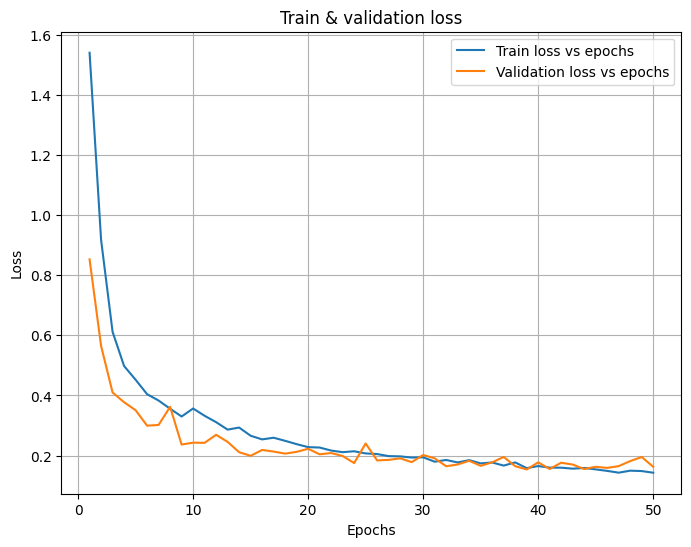

In [20]:
fig,ax=plt.subplots(figsize=(8,6))

cnn1_loss_values = loaded_cnn_history['loss']
cnn1_val_loss_values = loaded_cnn_history['val_loss']


epochs = range(1,len(cnn1_loss_values)+1)

ax.plot(epochs,cnn1_loss_values,label='Train loss vs epochs')
ax.plot(epochs,cnn1_val_loss_values,label='Validation loss vs epochs')

ax.set_title('Train & validation loss')
ax.legend()
ax.set_xlabel('Epochs')
plt.grid()
ax.set_ylabel('Loss');

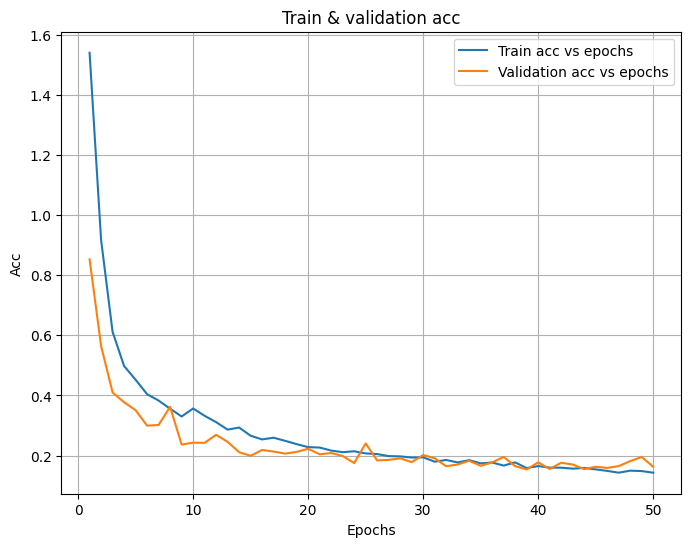

In [21]:
fig,ax=plt.subplots(figsize=(8,6))

cnn1_acc_values = loaded_cnn_history['accuracy']
cnn1_val_acc_values = loaded_cnn_history['val_accuracy']


epochs = range(1,len(cnn1_acc_values)+1)

ax.plot(epochs,cnn1_loss_values,label='Train acc vs epochs')
ax.plot(epochs,cnn1_val_loss_values,label='Validation acc vs epochs')

ax.set_title('Train & validation acc')
ax.legend()
ax.set_xlabel('Epochs')
plt.grid()
ax.set_ylabel('Acc');

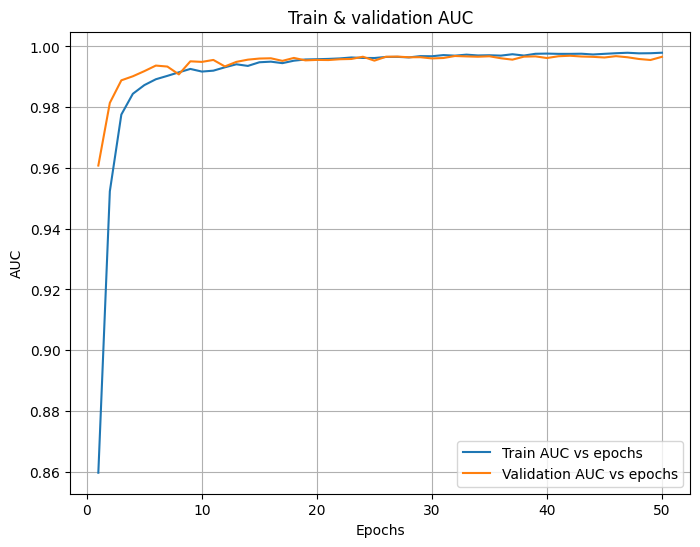

In [22]:
fig,ax=plt.subplots(figsize=(8,6))

cnn1_AUC_values = loaded_cnn_history['auc']
cnn1_val_AUC_values = loaded_cnn_history['val_auc']


epochs = range(1,len(cnn1_loss_values)+1)

ax.plot(epochs,cnn1_AUC_values,label='Train AUC vs epochs')
ax.plot(epochs,cnn1_val_AUC_values,label='Validation AUC vs epochs')

ax.set_title('Train & validation AUC')
ax.legend()
ax.set_xlabel('Epochs')
plt.grid()
ax.set_ylabel('AUC');

In [23]:
cnn1_test_class_pred = cnn_model_loaded.predict(test_generator,steps=len(test_generator))

77/77 [==============================] - 29s 374ms/step


In [24]:
cnn1_predicted_classes = np.argmax(cnn1_test_class_pred, axis=-1)
cnn1_predicted_classes

array([0, 0, 0, ..., 9, 9, 0])

In [25]:
test_true_classes = test_generator.classes
test_true_classes

array([0, 0, 0, ..., 9, 9, 9], dtype=int32)

In [26]:
test_class_labels = list(test_generator.class_indices.keys()) 
test_class_labels

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [27]:
test_class_labels_mapping = {0: 'Tshirts', 1: 'Shirts', 2: 'casual_shoes',3: 'watches' , 4: 'sports_shoes', 5: 'kurtas',6:'handbags',7:'heels',8:'sunglasses',9:'wallets'}
test_class_labels_words = list(test_class_labels_mapping.values())
test_class_labels_words

['Tshirts',
 'Shirts',
 'casual_shoes',
 'watches',
 'sports_shoes',
 'kurtas',
 'handbags',
 'heels',
 'sunglasses',
 'wallets']

In [28]:
cnn1_cm_digits = confusion_matrix(test_true_classes, cnn1_predicted_classes)
cnn1_cm_digits

array([[1375,   26,    0,    1,    0,   12,    0,    0,    0,    0],
       [   9,  624,    0,    0,    0,    8,    2,    0,    0,    0],
       [   2,    0,  472,    0,   84,    0,    1,   10,    0,    0],
       [   6,    0,    0,  498,    0,    1,    2,    0,    0,    1],
       [   1,    0,   59,    0,  344,    0,    1,    1,    0,    1],
       [   3,    3,    0,    0,    0,  363,    0,    0,    0,    0],
       [   2,    0,    1,    0,    0,    0,  343,    1,    0,    5],
       [   2,    0,    6,    0,    0,    0,    0,  256,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,  213,    0],
       [   2,    0,    0,    0,    0,    0,    7,    0,    0,  178]])

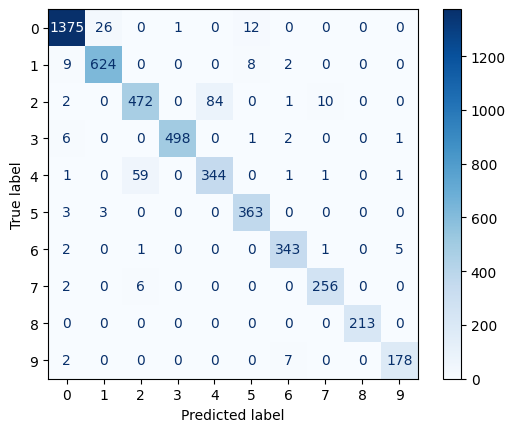

In [29]:
cnn1_disp = ConfusionMatrixDisplay(
    confusion_matrix=cnn1_cm_digits)

cnn1_disp.plot(cmap=plt.cm.Blues)
plt.show()

In [30]:
cnn1_report = classification_report(test_true_classes, cnn1_predicted_classes, target_names=test_class_labels_words,)
print(cnn1_report)

              precision    recall  f1-score   support

     Tshirts       0.98      0.97      0.98      1414
      Shirts       0.96      0.97      0.96       643
casual_shoes       0.88      0.83      0.85       569
     watches       1.00      0.98      0.99       508
sports_shoes       0.80      0.85      0.82       407
      kurtas       0.95      0.98      0.96       369
    handbags       0.96      0.97      0.97       352
       heels       0.96      0.97      0.96       264
  sunglasses       1.00      1.00      1.00       213
     wallets       0.96      0.95      0.96       187

    accuracy                           0.95      4926
   macro avg       0.94      0.95      0.95      4926
weighted avg       0.95      0.95      0.95      4926



In [31]:
cnn1_report_output = classification_report(test_true_classes, cnn1_predicted_classes, target_names=test_class_labels_words,output_dict=True)
print(cnn1_report_output)

{'Tshirts': {'precision': 0.9807417974322397, 'recall': 0.9724186704384724, 'f1-score': 0.9765625, 'support': 1414}, 'Shirts': {'precision': 0.9555895865237366, 'recall': 0.9704510108864697, 'f1-score': 0.962962962962963, 'support': 643}, 'casual_shoes': {'precision': 0.8773234200743495, 'recall': 0.8295254833040422, 'f1-score': 0.8527551942186089, 'support': 569}, 'watches': {'precision': 0.9979959919839679, 'recall': 0.9803149606299213, 'f1-score': 0.9890764647467726, 'support': 508}, 'sports_shoes': {'precision': 0.8037383177570093, 'recall': 0.8452088452088452, 'f1-score': 0.8239520958083831, 'support': 407}, 'kurtas': {'precision': 0.9453125, 'recall': 0.983739837398374, 'f1-score': 0.9641434262948206, 'support': 369}, 'handbags': {'precision': 0.9634831460674157, 'recall': 0.9744318181818182, 'f1-score': 0.9689265536723164, 'support': 352}, 'heels': {'precision': 0.9552238805970149, 'recall': 0.9696969696969697, 'f1-score': 0.9624060150375939, 'support': 264}, 'sunglasses': {'pre

In [32]:
test_class_labels_words

['Tshirts',
 'Shirts',
 'casual_shoes',
 'watches',
 'sports_shoes',
 'kurtas',
 'handbags',
 'heels',
 'sunglasses',
 'wallets']

In [33]:
cnn1_f1_scores = {class_name: cnn1_report_output[class_name]['f1-score'] for class_name in test_class_labels_words}
cnn1_f1_scores_rounded = {class_name: round(score, 2) for class_name, score in cnn1_f1_scores.items()}
cnn1_f1_scores_rounded

{'Tshirts': 0.98,
 'Shirts': 0.96,
 'casual_shoes': 0.85,
 'watches': 0.99,
 'sports_shoes': 0.82,
 'kurtas': 0.96,
 'handbags': 0.97,
 'heels': 0.96,
 'sunglasses': 1.0,
 'wallets': 0.96}

In [34]:
cnn1_model_precision = cnn1_report_output['weighted avg']['precision']
cnn1_model_precision

0.9475402557244984

In [35]:
cnn1_model_recall = cnn1_report_output['weighted avg']['recall']
cnn1_model_recall

0.9472188388144539

In [36]:
cnn1_model_f1_score = cnn1_report_output['weighted avg']['f1-score']
cnn1_model_f1_score

0.947203585301183

In [37]:
metrics_col = ['Model_name','Precision','Recall','F1_score']
metrics_table = pd.DataFrame(columns=metrics_col)
metrics_table

,Model_name,Precision,Recall,F1_score


In [38]:
#Create a summary tableL
table_columns = ['Model Name', 'Overall_F1-score'] + list(cnn1_f1_scores.keys())
f1score_sumary_table = pd.DataFrame(columns=table_columns)
f1score_sumary_table

,Model Name,Overall_F1-score,Tshirts,Shirts,casual_shoes,watches,sports_shoes,kurtas,handbags,heels,sunglasses,wallets


In [39]:
metrics_table.loc[0] = ['cnn1_model',round(cnn1_model_precision,2),round(cnn1_model_recall,2),round(cnn1_model_f1_score,2)]
metrics_table

,Model_name,Precision,Recall,F1_score
0,cnn1_model,0.95,0.95,0.95


In [40]:
f1score_sumary_table.loc[0] = ['cnn1_model', round(cnn1_model_f1_score,2)] + list(cnn1_f1_scores_rounded.values())
f1score_sumary_table

,Model Name,Overall_F1-score,Tshirts,Shirts,casual_shoes,watches,sports_shoes,kurtas,handbags,heels,sunglasses,wallets
0,cnn1_model,0.95,0.98,0.96,0.85,0.99,0.82,0.96,0.97,0.96,1.0,0.96


### 2nd CNN model- L2 Regularizer

In [ ]:


cnn_model_l2 = Sequential()
cnn_model_l2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3), kernel_regularizer = l2(0.0005)))
cnn_model_l2.add(MaxPooling2D(2, 2))

# Corrected Conv2D layer with kernel_regularizer parameter
cnn_model_l2.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(0.0005)))
cnn_model_l2.add(MaxPooling2D(2, 2))

# Corrected Conv2D layer with kernel_regularizer parameter
cnn_model_l2.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer = l2(0.0005)))
cnn_model_l2.add(MaxPooling2D(2, 2))

# Corrected Conv2D layer with kernel_regularizer parameter
cnn_model_l2.add(Conv2D(256, (3, 3), activation='relu', kernel_regularizer = l2(0.0005)))
cnn_model_l2.add(MaxPooling2D(2, 2))

cnn_model_l2.add(Flatten())
cnn_model_l2.add(Dense(128, activation='relu', kernel_regularizer=l2(0.0005)))
cnn_model_l2.add(Dense(10, activation='softmax', kernel_regularizer = l2(0.0005)))


In [ ]:
cnn_model_l2.compile(loss='categorical_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy','AUC','Precision','Recall'])

In [ ]:
history_l2 = cnn_model_l2.fit(train_generator,
                        steps_per_epoch=len(train_generator),
                        epochs=50,
                        validation_data=val_generator,
                        validation_steps=len(val_generator))

#### Save model

In [ ]:
cnn_model_l2.save('cnn_model_l2_50epoch.h5')

In [ ]:
hdf5storage.savemat("cnn_model_l2_50epoch.h5", history_l2.history)

#### Evaluate the model

In [ ]:
cnn_l2_loaded = load_model('cnn_model_l2_50epoch.h5')

In [ ]:
cnn_l2_loaded.evaluate(train_generator)

In [ ]:
cnn_l2_loaded.evaluate(val_generator)

In [ ]:
cnn_l2_loaded.evaluate(test_generator)

In [ ]:
cnn_l2_history_loaded = hdf5storage.loadmat("cnn_model_l2_50epoch.h5")

In [ ]:
print(cnn_l2_history_loaded.keys())

In [ ]:
fig,ax=plt.subplots(figsize=(8,6))

cnn_l2_loss_values = cnn_l2_history_loaded['loss']
cnn_l2_val_loss_values = cnn_l2_history_loaded['val_loss']


epochs = range(1,len(cnn_l2_loss_values)+1)

ax.plot(epochs,cnn_l2_loss_values,label='Train loss vs epochs')
ax.plot(epochs,cnn_l2_val_loss_values,label='Validation loss vs epochs')

ax.set_title('Train & validation loss')
ax.legend()
ax.set_xlabel('Epochs')
plt.grid()
ax.set_ylabel('Loss');

In [ ]:
fig,ax=plt.subplots(figsize=(8,6))

cnn_l2_acc_values = cnn_l2_history_loaded['accuracy']
cnn_l2_val_acc_values = cnn_l2_history_loaded['val_accuracy']


epochs = range(1,len(cnn_l2_acc_values)+1)

ax.plot(epochs,cnn_l2_acc_values,label='Train acc vs epochs')
ax.plot(epochs,cnn_l2_val_acc_values,label='Validation acc vs epochs')

ax.set_title('Train & validation acc')
ax.legend()
ax.set_xlabel('Epochs')
plt.grid()
ax.set_ylabel('Acc');

In [ ]:
fig,ax=plt.subplots(figsize=(8,6))

cnn_l2_AUC_values = cnn_l2_history_loaded['auc']
cnn_l2_val_AUC_values = cnn_l2_history_loaded['val_auc']


epochs = range(1,len(cnn_l2_AUC_values)+1)

ax.plot(epochs,cnn_l2_AUC_values,label='Train AUC vs epochs')
ax.plot(epochs,cnn_l2_val_AUC_values,label='Validation AUC vs epochs')

ax.set_title('Train & validation AUC')
ax.legend()
ax.set_xlabel('Epochs')
plt.grid()
ax.set_ylabel('AUC');

In [ ]:
cnn_l2_test_class_pred = cnn_l2_loaded.predict(test_generator,steps=len(test_generator))

In [ ]:
cnn_l2_predicted_classes = np.argmax(cnn_l2_test_class_pred, axis=-1)
cnn_l2_predicted_classes

In [ ]:
test_true_classes = test_generator.classes
test_true_classes

In [ ]:
test_class_labels = list(test_generator.class_indices.keys()) 
test_class_labels

In [ ]:
test_class_labels_mapping = {0: 'Tshirts', 1: 'Shirts', 2: 'casual_shoes',3: 'watches' , 4: 'sports_shoes', 5: 'kurtas',6:'handbags',7:'heels',8:'sunglasses',9:'wallets'}
test_class_labels_words = list(test_class_labels_mapping.values())
test_class_labels_words

In [ ]:
cnn_l2_cm_digits = confusion_matrix(test_true_classes, cnn_l2_predicted_classes)
cnn_l2_cm_digits

In [ ]:
cnn1_disp = ConfusionMatrixDisplay(
    confusion_matrix=cnn_l2_cm_digits)

cnn1_disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
cnn_l2_report = classification_report(test_true_classes, cnn_l2_predicted_classes, target_names=test_class_labels_words)
print(cnn_l2_report)

In [ ]:
cnn_l2_report_output =  classification_report(test_true_classes, cnn_l2_predicted_classes, target_names=test_class_labels_words,output_dict=True)
print(cnn_l2_report_output)

In [ ]:
cnn_l2_f1_scores = {class_name: cnn_l2_report_output[class_name]['f1-score'] for class_name in test_class_labels_words}
cnn_l2_f1_scores_rounded = {class_name: round(score, 2) for class_name, score in cnn_l2_f1_scores.items()}
cnn_l2_f1_scores_rounded

In [ ]:
cnn_l2_model_precision = cnn_l2_report_output['weighted avg']['precision']
cnn_l2_model_precision

In [ ]:
cnn_l2_model_recall = cnn_l2_report_output['weighted avg']['recall']
cnn_l2_model_recall

In [ ]:
cnn_l2_model_f1_score = cnn_l2_report_output['weighted avg']['f1-score']
cnn_l2_model_f1_score

In [ ]:
metrics_table.loc[1] = ['cnn_l2_model',round(cnn_l2_model_precision,2),round(cnn_l2_model_recall,2),round(cnn_l2_model_f1_score,2)]
metrics_table

In [ ]:
f1score_sumary_table.loc[1] = ['cnn_l2_model', round(cnn_l2_model_f1_score,2)] + list(cnn_l2_f1_scores_rounded.values())
f1score_sumary_table

### 3th CNN model- Dropout

In [ ]:

cnn_model_dropout = Sequential()
cnn_model_dropout.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
cnn_model_dropout.add(MaxPooling2D(2, 2))
cnn_model_dropout.add(Dropout(0.3))  # Add dropout with 30% dropout rate

#  Conv2D layer with kernel_regularizer parameter
cnn_model_dropout.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model_dropout.add(MaxPooling2D(2, 2))
cnn_model_dropout.add(Dropout(0.3))  # Add dropout with 30% dropout rate

#  Conv2D layer with kernel_regularizer parameter
cnn_model_dropout.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model_dropout.add(MaxPooling2D(2, 2))
cnn_model_dropout.add(Dropout(0.3))  # Add dropout with 30% dropout rate

#  Conv2D layer with kernel_regularizer parameter
cnn_model_dropout.add(Conv2D(256, (3, 3), activation='relu'))
cnn_model_dropout.add(MaxPooling2D(2, 2))
cnn_model_dropout.add(Dropout(0.3))  # Add dropout with 30% dropout rate

cnn_model_dropout.add(Flatten())
cnn_model_dropout.add(Dense(128, activation='relu'))
cnn_model_dropout.add(Dense(num_classes, activation='softmax'))

In [ ]:
cnn_model_dropout.compile(loss='categorical_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy','AUC','Precision','Recall'])

In [ ]:
history_cnn_dropout = cnn_model_dropout.fit(train_generator,
                        steps_per_epoch=len(train_generator),
                        epochs=50,
                        validation_data=val_generator,
                        validation_steps=len(val_generator))

#### Save the model

In [ ]:
cnn_model_dropout.save('cnn_model_dropout_50epoch.h5')

In [ ]:
hdf5storage.savemat("history_cnn_dropout_50epoch.h5", history_cnn_dropout.history)

#### Evaluate the model

In [ ]:
cnn_dropout_loaded = load_model('cnn_model_dropout_50epoch.h5')

In [ ]:
cnn_dropout_loaded.evaluate(train_generator)

In [ ]:
cnn_dropout_loaded.evaluate(val_generator)

In [ ]:
cnn_dropout_loaded.evaluate(test_generator)

In [ ]:
cnn_dropout_history_loaded = hdf5storage.loadmat("history_cnn_dropout_50epoch.h5")

In [ ]:
print(cnn_dropout_history_loaded.keys())

In [ ]:
fig,ax=plt.subplots(figsize=(8,6))

cnn_dropout_loss_values = cnn_dropout_history_loaded['loss']
cnn_dropout_val_loss_values = cnn_dropout_history_loaded['val_loss']


epochs = range(1,len(cnn_dropout_loss_values)+1)

ax.plot(epochs,cnn_dropout_loss_values,label='Train loss vs epochs')
ax.plot(epochs,cnn_dropout_val_loss_values,label='Validation loss vs epochs')

ax.set_title('Train & validation loss')
ax.legend()
ax.set_xlabel('Epochs')
plt.grid()
ax.set_ylabel('Loss');

In [ ]:
fig,ax=plt.subplots(figsize=(8,6))

cnn_dropout_acc_values = cnn_dropout_history_loaded['accuracy']
cnn_dropout_val_acc_values = cnn_dropout_history_loaded['val_accuracy']


epochs = range(1,len(cnn_dropout_acc_values)+1)

ax.plot(epochs,cnn_dropout_acc_values,label='Train acc vs epochs')
ax.plot(epochs,cnn_dropout_val_acc_values,label='Validation acc vs epochs')

ax.set_title('Train & validation acc')
ax.legend()
ax.set_xlabel('Epochs')
plt.grid()
ax.set_ylabel('Acc');

In [ ]:
fig,ax=plt.subplots(figsize=(8,6))

cnn_dropout_AUC_values = cnn_dropout_history_loaded['auc']
cnn_dropout_val_AUC_values = cnn_dropout_history_loaded['val_auc']


epochs = range(1,len(cnn_dropout_AUC_values)+1)

ax.plot(epochs,cnn_dropout_AUC_values,label='Train AUC vs epochs')
ax.plot(epochs,cnn_dropout_val_AUC_values,label='Validation AUC vs epochs')

ax.set_title('Train & validation AUC')
ax.legend()
ax.set_xlabel('Epochs')
plt.grid()
ax.set_ylabel('AUC');

In [ ]:
cnn_dropout_test_class_pred = cnn_dropout_loaded.predict(test_generator,steps=len(test_generator))

In [ ]:
cnn_dropout_predicted_classes = np.argmax(cnn_dropout_test_class_pred, axis=-1)
cnn_dropout_predicted_classes

In [ ]:
test_true_classes = test_generator.classes
test_true_classes

In [ ]:
test_class_labels = list(test_generator.class_indices.keys()) 
test_class_labels

In [ ]:
test_class_labels_mapping = {0: 'Tshirts', 1: 'Shirts', 2: 'casual_shoes',3: 'watches' , 4: 'sports_shoes', 5: 'kurtas',6:'handbags',7:'heels',8:'sunglasses',9:'wallets'}
test_class_labels_words = list(test_class_labels_mapping.values())
test_class_labels_words

In [ ]:
cnn_dropout_cm_digits = confusion_matrix(test_true_classes, cnn_dropout_predicted_classes)
cnn_dropout_cm_digits

In [ ]:
cnn_dropout_disp = ConfusionMatrixDisplay(
    confusion_matrix=cnn_dropout_cm_digits)

cnn1_disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
cnn_dropout_report = classification_report(test_true_classes, cnn_dropout_predicted_classes, target_names=test_class_labels_words)
print(cnn_dropout_report)

In [ ]:
cnn_droupout_report_output =  classification_report(test_true_classes, cnn_dropout_predicted_classes, target_names=test_class_labels_words,output_dict=True)
print(cnn_droupout_report_output)

In [ ]:
cnn_dropout_f1_scores = {class_name: cnn_droupout_report_output[class_name]['f1-score'] for class_name in test_class_labels_words}
cnn_dropout_f1_scores_rounded = {class_name: round(score, 2) for class_name, score in cnn_dropout_f1_scores.items()}
cnn_dropout_f1_scores_rounded

In [ ]:
cnn_dropout_model_precision = cnn_droupout_report_output['weighted avg']['precision']
cnn_dropout_model_precision

In [ ]:
cnn_dropout_model_recall = cnn_droupout_report_output['weighted avg']['recall']
cnn_dropout_model_recall

In [ ]:
cnn_dropout_model_f1_score = cnn_droupout_report_output['weighted avg']['f1-score']
cnn_dropout_model_f1_score

In [ ]:
metrics_table.loc[2] = ['cnn_dropout_model',round(cnn_dropout_model_precision,2),round(cnn_dropout_model_recall,2),round(cnn_dropout_model_f1_score,2)]
metrics_table

In [ ]:
f1score_sumary_table.loc[2] = ['cnn_dropout_model', round(cnn_dropout_model_f1_score,2)] + list(cnn_dropout_f1_scores_rounded.values())
f1score_sumary_table

### 4th model-dropout at last 2 layers

In [41]:

cnn_model_dropout2 = Sequential()
cnn_model_dropout2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
cnn_model_dropout2.add(MaxPooling2D(2, 2))


#  Conv2D layer with kernel_regularizer parameter
cnn_model_dropout2.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model_dropout2.add(MaxPooling2D(2, 2))


#  Conv2D layer with kernel_regularizer parameter
cnn_model_dropout2.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model_dropout2.add(MaxPooling2D(2, 2))


#  Conv2D layer with kernel_regularizer parameter
cnn_model_dropout2.add(Conv2D(256, (3, 3), activation='relu'))
cnn_model_dropout2.add(MaxPooling2D(2, 2))


cnn_model_dropout2.add(Flatten())
cnn_model_dropout2.add(Dropout(0.3))
cnn_model_dropout2.add(Dense(128, activation='relu'))
cnn_model_dropout2.add(Dropout(0.3))
cnn_model_dropout2.add(Dense(num_classes, activation='softmax'))

In [42]:
cnn_model_dropout2.compile(loss='categorical_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy','AUC','Precision','Recall'])

In [43]:
history_cnn_dropout2 = cnn_model_dropout2.fit(train_generator,
                        steps_per_epoch=len(train_generator),
                        epochs=50,
                        validation_data=val_generator,
                        validation_steps=len(val_generator))

Epoch 1/50
231/231 [==============================] - 337s 1s/step - loss: 1.7359 - accuracy: 0.3826 - auc: 0.8183 - precision: 0.6343 - recall: 0.1670 - val_loss: 1.0693 - val_accuracy: 0.5583 - val_auc: 0.9391 - val_precision: 0.6847 - val_recall: 0.4053
Epoch 2/50
231/231 [==============================] - 337s 1s/step - loss: 1.1630 - accuracy: 0.5665 - auc: 0.9242 - precision: 0.7109 - recall: 0.3878 - val_loss: 0.7419 - val_accuracy: 0.7222 - val_auc: 0.9689 - val_precision: 0.8083 - val_recall: 0.6245
Epoch 3/50
231/231 [==============================] - 337s 1s/step - loss: 0.8900 - accuracy: 0.6636 - auc: 0.9553 - precision: 0.7695 - recall: 0.5520 - val_loss: 0.4563 - val_accuracy: 0.8353 - val_auc: 0.9876 - val_precision: 0.8740 - val_recall: 0.7927
Epoch 4/50
231/231 [==============================] - 344s 1s/step - loss: 0.7891 - accuracy: 0.7085 - auc: 0.9644 - precision: 0.7943 - recall: 0.6089 - val_loss: 0.5236 - val_accuracy: 0.7897 - val_auc: 0.9835 - val_precision: 

Epoch 33/50
231/231 [==============================] - 352s 2s/step - loss: 0.2683 - accuracy: 0.9016 - auc: 0.9944 - precision: 0.9136 - recall: 0.8901 - val_loss: 0.2711 - val_accuracy: 0.9023 - val_auc: 0.9945 - val_precision: 0.9163 - val_recall: 0.8896
Epoch 34/50
231/231 [==============================] - 353s 2s/step - loss: 0.2787 - accuracy: 0.9015 - auc: 0.9940 - precision: 0.9149 - recall: 0.8897 - val_loss: 0.1894 - val_accuracy: 0.9341 - val_auc: 0.9963 - val_precision: 0.9380 - val_recall: 0.9319
Epoch 35/50
231/231 [==============================] - 355s 2s/step - loss: 0.2694 - accuracy: 0.9047 - auc: 0.9942 - precision: 0.9155 - recall: 0.8906 - val_loss: 0.2248 - val_accuracy: 0.9137 - val_auc: 0.9954 - val_precision: 0.9191 - val_recall: 0.9094
Epoch 36/50
231/231 [==============================] - 360s 2s/step - loss: 0.2561 - accuracy: 0.9096 - auc: 0.9947 - precision: 0.9201 - recall: 0.8980 - val_loss: 0.1873 - val_accuracy: 0.9337 - val_auc: 0.9962 - val_precisi

#### Save the model and history

In [44]:
cnn_model_dropout2.save('cnn_model_dropout2_50epoch.h5')

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [45]:
hdf5storage.savemat("history_cnn_dropout2_50epoch.h5", history_cnn_dropout2.history)

#### Evaluate the model

In [46]:
cnn_dropout2_loaded = load_model('cnn_model_dropout2_50epoch.h5')

In [47]:
cnn_dropout2_loaded.evaluate(train_generator)

231/231 [==============================] - 110s 475ms/step - loss: 0.1645 - accuracy: 0.9397 - auc: 0.9975 - precision: 0.9447 - recall: 0.9362


[0.16453512012958527,
 0.9397239685058594,
 0.9975210428237915,
 0.9447061419487,
 0.9362062215805054]

In [48]:
cnn_dropout2_loaded.evaluate(train_generator)

231/231 [==============================] - 113s 489ms/step - loss: 0.1584 - accuracy: 0.9439 - auc: 0.9977 - precision: 0.9490 - recall: 0.9399


[0.15839408338069916,
 0.9439182877540588,
 0.9977259635925293,
 0.9490436911582947,
 0.9399269223213196]

In [49]:
history_cnn_dropout2_loaded = hdf5storage.loadmat("history_cnn_dropout2_50epoch.h5")

In [50]:
print(history_cnn_dropout2_loaded.keys())

dict_keys(['accuracy', 'auc', 'loss', 'precision', 'recall', 'val_accuracy', 'val_auc', 'val_loss', 'val_precision', 'val_recall'])


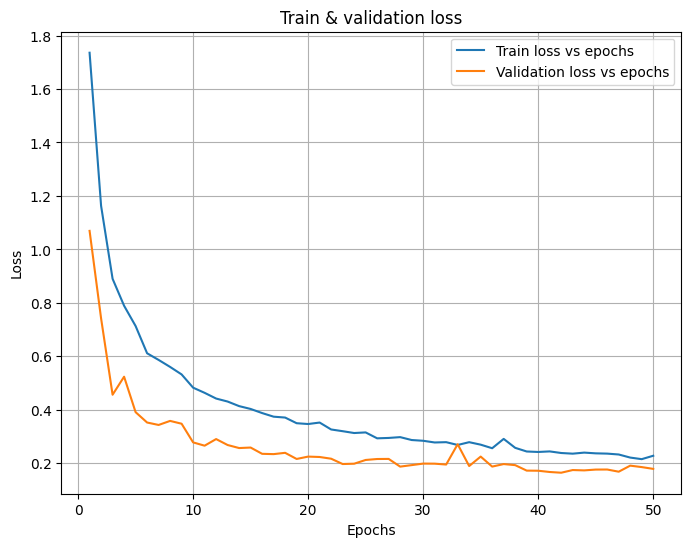

In [51]:
fig,ax=plt.subplots(figsize=(8,6))

cnn_dropout2_loss_values = history_cnn_dropout2_loaded['loss']
cnn_dropout2_val_loss_values = history_cnn_dropout2_loaded['val_loss']


epochs = range(1,len(cnn_dropout2_loss_values)+1)

ax.plot(epochs,cnn_dropout2_loss_values,label='Train loss vs epochs')
ax.plot(epochs,cnn_dropout2_val_loss_values,label='Validation loss vs epochs')

ax.set_title('Train & validation loss')
ax.legend()
ax.set_xlabel('Epochs')
plt.grid()
ax.set_ylabel('Loss');